In [20]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

cv2.__version__

'3.3.0'

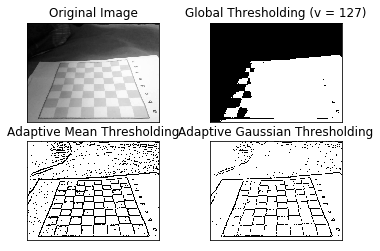

In [33]:
gray = cv2.imread('/home/kb/PycharmProjects/ocv/c1.jpg', cv2.COLOR_BGR2GRAY)
gray = cv2.medianBlur(gray,5)
    # cv2.imshow('test', inp)
ret,th1 = cv2.threshold(gray,127,255,cv2.THRESH_BINARY)
th2 = cv2.adaptiveThreshold(gray,255,cv2.ADAPTIVE_THRESH_MEAN_C,\
            cv2.THRESH_BINARY,11,2)
th3 = cv2.adaptiveThreshold(gray,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv2.THRESH_BINARY,11,2)
titles = ['Original Image', 'Global Thresholding (v = 127)',
            'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [gray, th1, th2, th3]
for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

In [12]:
_, contours, _ = cv2.findContours(thresh.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
for cnt in contours:
#    print(cv2.contourArea(cnt) )
   if cv2.contourArea(cnt) > 1000:  # remove small areas like noise etc
        hull = cv2.convexHull(cnt)  # find the convex hull of contour
        hull = cv2.approxPolyDP(hull, 0.1 * cv2.arcLength(hull, True), True)
        if len(hull) == 4:
            cv2.drawContours(gray, [hull], 0, (0, 100, 100), 3)

cv2.imshow('img', gray)
cv2.waitKey(0)
cv2.destroyAllWindows()